# Exercise 1 - GIS

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
fp = "world_m.shp"
data = gpd.read_file(fp)

data.crs

{'init': 'epsg:3395'}

In [3]:
data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,gdp_per_ca,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,0.000784,"POLYGON ((6813956.990 4227673.562, 6927484.435..."
1,12799293.0,Africa,Angola,AGO,110300.0,0.008618,"MULTIPOLYGON (((1817460.823 -651055.118, 18449..."
2,3639453.0,Europe,Albania,ALB,21810.0,0.005993,"POLYGON ((2292095.859 5110825.730, 2277950.230..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,0.038408,"POLYGON ((5741805.754 2765811.385, 5761611.935..."
4,40913584.0,South America,Argentina,ARG,573900.0,0.014027,"MULTIPOLYGON (((-7291426.647 -7365665.131, -73..."


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# Let's make a backup copy of our data
data_etrs89e = data.copy()

# Reproject the data
data = data.to_crs(epsg=3035)

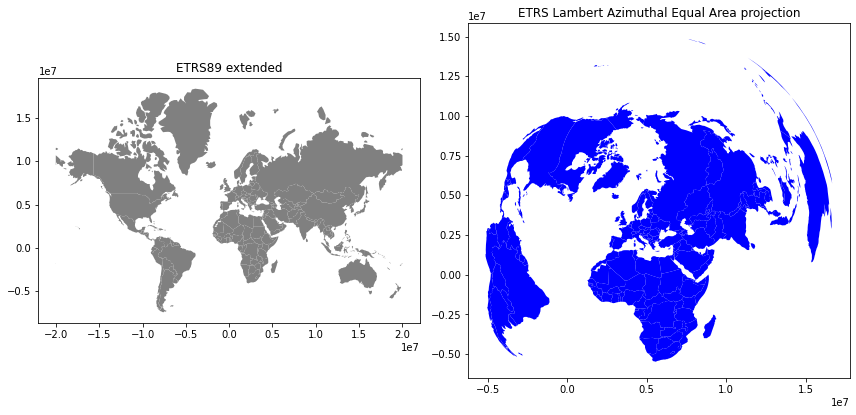

In [6]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in etrs89 extended
data_etrs89e.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("ETRS89 extended");

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue');

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

In [7]:
fp2 = "cities.shp"
cdata = gpd.read_file(fp2)

# Let's make a backup copy of our data
cdata_etrs89e = (cdata.copy()).to_crs(epsg=3395)

# Reproject the data
cdata = cdata.to_crs(epsg=3035)

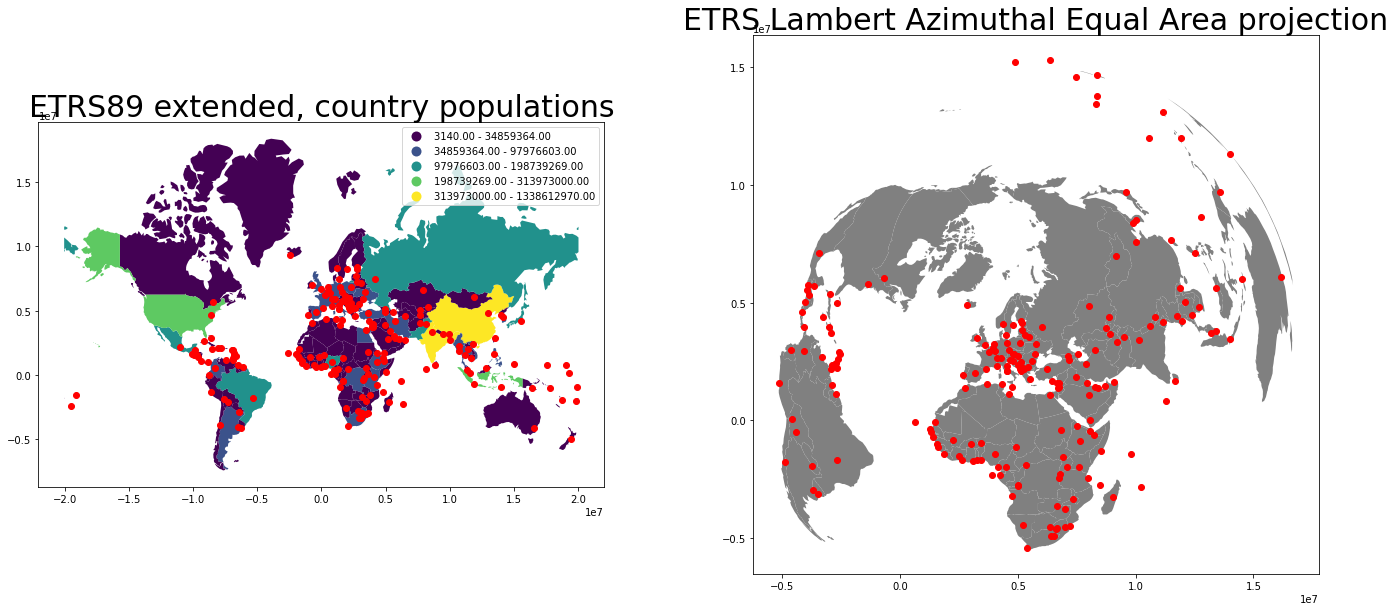

In [8]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Plot the data in etrs89 extended CRS
data_etrs89e.plot(ax=ax1, column= 'pop_est', legend=True, scheme='NaturalBreaks');
cdata_etrs89e.plot(ax=ax1, color="red");

# Add title
ax1.set_title("ETRS89 extended, country populations", fontsize = 30);

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='gray');
cdata.plot(ax=ax2, color = "red");

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection", fontsize = 30);

# Remove empty white space around the plot

plt.tight_layout()

# Exercise 2

In [61]:
df = pd.read_csv("hasy-data-labels.csv")
df

,path,symbol_id,latex,user_id
0,hasy-data/v2-00000.png,31,A,50
1,hasy-data/v2-00001.png,31,A,10
2,hasy-data/v2-00002.png,31,A,43
3,hasy-data/v2-00003.png,31,A,43
4,hasy-data/v2-00004.png,31,A,4435
...,...,...,...,...
168228,hasy-data/v2-168228.png,1400,\guillemotleft,16925
168229,hasy-data/v2-168229.png,1400,\guillemotleft,16925
168230,hasy-data/v2-168230.png,1400,\guillemotleft,16925
168231,hasy-data/v2-168231.png,1400,\guillemotleft,16925


In [62]:
df = df.loc[(df['symbol_id']>=70) & (df['symbol_id']<=80)]
df

,path,symbol_id,latex,user_id
345,hasy-data/v2-00345.png,70,0,10
346,hasy-data/v2-00346.png,70,0,31
347,hasy-data/v2-00347.png,70,0,10
348,hasy-data/v2-00348.png,70,0,10
349,hasy-data/v2-00349.png,70,0,10
...,...,...,...,...
20823,hasy-data/v2-20823.png,79,9,101356
20824,hasy-data/v2-20824.png,79,9,116471
20825,hasy-data/v2-20825.png,79,9,124511
20826,hasy-data/v2-20826.png,79,9,124916


In [63]:
df['path'][345]

'hasy-data/v2-00345.png'

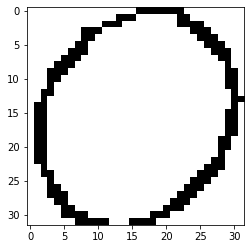

In [64]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image

im = Image.open(df['path'][349])

plt.imshow(im)

In [65]:
data = []
ldata =[]
for i, row in df.iterrows():
    # Read images and resize them, Image.resize() returns self.copy() if self.size==size
    # Convert to greyscale
    im = Image.open(row['path']).convert('L').resize(size=(32,32))
    
    # Convert Image to numpy array
    npimg = np.array(im)    
    
    # Convert to black and white from greyscale
    npimg2 = np.where(npimg > 127, 255,0)
    
    # Flatten image to one dimensional table
    npimg2 = npimg.flatten()
    
    # To list from numpy array
    imlist = npimg2.tolist()
    
    # Append right size black and white image to array
    data.append(imlist)
    
    label = [row['symbol_id'],row['path']]
    #label = row['symbol_id']
    ldata.append(label)

In [66]:
np.shape(data)

(1020, 1024)

In [67]:
ldata[:][0]

[70, 'hasy-data/v2-00345.png']

In [68]:
ldatadf = pd.DataFrame(data = ldata, columns=['symbol_id', 'path'])
ldatadf.head()

,symbol_id,path
0,70,hasy-data/v2-00345.png
1,70,hasy-data/v2-00346.png
2,70,hasy-data/v2-00347.png
3,70,hasy-data/v2-00348.png
4,70,hasy-data/v2-00349.png


In [69]:
sdata = data.copy()
sldata = ldatadf.copy()
sdatadf = pd.DataFrame(sdata)

In [70]:
import csv

with open("symboldata.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile)
     wr.writerow(sdata)

In [71]:
sldata.to_csv("targetdata.csv")

In [72]:
sldata[0:2]

,symbol_id,path
0,70,hasy-data/v2-00345.png
1,70,hasy-data/v2-00346.png


In [73]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sdata, sldata, test_size=0.2, random_state=3)

In [75]:
y_test

,symbol_id,path
270,71,hasy-data/v2-20078.png
674,76,hasy-data/v2-20482.png
552,74,hasy-data/v2-20360.png
400,72,hasy-data/v2-20208.png
333,72,hasy-data/v2-20141.png
...,...,...
654,75,hasy-data/v2-20462.png
3,70,hasy-data/v2-00348.png
498,73,hasy-data/v2-20306.png
856,78,hasy-data/v2-20664.png


In [76]:
classifier = logisticRegr.fit(x_train, y_train['symbol_id'])

C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tipe_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [77]:
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
# Returns a NumPy Array
# Predict for One Observation (image)
predictions = logisticRegr.predict(x_test)
predictions

array([71, 76, 74, 72, 72, 71, 70, 73, 76, 72, 71, 71, 75, 73, 71, 79, 79,
       71, 75, 79, 76, 70, 73, 78, 70, 78, 76, 74, 78, 73, 79, 77, 76, 71,
       77, 79, 70, 78, 74, 70, 71, 76, 72, 75, 71, 73, 74, 75, 76, 78, 73,
       72, 73, 71, 79, 75, 78, 71, 78, 70, 76, 78, 73, 75, 77, 78, 70, 78,
       74, 72, 75, 78, 76, 72, 72, 76, 77, 79, 78, 78, 72, 75, 73, 71, 74,
       73, 79, 79, 73, 72, 72, 76, 72, 77, 75, 77, 77, 72, 77, 71, 70, 79,
       70, 75, 71, 77, 70, 75, 79, 74, 71, 79, 77, 70, 75, 72, 71, 72, 72,
       78, 71, 71, 78, 72, 71, 72, 71, 76, 78, 71, 79, 72, 73, 76, 73, 76,
       76, 72, 70, 70, 70, 71, 72, 76, 75, 78, 70, 70, 74, 79, 76, 70, 73,
       73, 72, 73, 73, 79, 72, 72, 74, 72, 79, 71, 79, 71, 71, 73, 71, 77,
       70, 70, 77, 70, 70, 73, 74, 73, 77, 73, 79, 71, 77, 75, 70, 77, 75,
       70, 76, 70, 71, 72, 79, 75, 70, 76, 76, 73, 78, 75, 70, 73, 73, 77],
      dtype=int64)

In [79]:
print(list(y_test['symbol_id']))

[71, 76, 74, 72, 72, 71, 70, 73, 76, 72, 71, 78, 75, 79, 71, 79, 79, 71, 75, 79, 76, 70, 73, 78, 70, 78, 76, 74, 78, 73, 75, 77, 76, 71, 77, 79, 70, 78, 74, 76, 71, 75, 72, 75, 71, 73, 74, 78, 76, 78, 73, 72, 73, 71, 79, 75, 78, 78, 78, 75, 76, 78, 73, 75, 77, 78, 70, 74, 74, 70, 75, 78, 76, 72, 72, 76, 77, 79, 78, 71, 72, 75, 73, 71, 74, 73, 79, 73, 73, 72, 72, 75, 72, 73, 75, 77, 77, 72, 77, 71, 70, 79, 70, 75, 71, 77, 70, 75, 71, 74, 71, 79, 77, 70, 75, 72, 71, 77, 72, 78, 71, 71, 78, 72, 79, 72, 71, 76, 78, 79, 79, 72, 73, 76, 73, 76, 76, 72, 70, 70, 79, 79, 77, 76, 78, 78, 70, 70, 74, 79, 74, 70, 73, 73, 72, 73, 73, 79, 70, 78, 74, 72, 79, 71, 73, 78, 71, 73, 71, 77, 70, 70, 77, 70, 70, 79, 74, 73, 77, 73, 79, 71, 77, 73, 70, 77, 75, 70, 76, 70, 71, 72, 73, 75, 70, 76, 76, 73, 78, 75, 70, 73, 78, 75]


In [80]:
logisticRegr.predict(x_test[:10])

array([71, 76, 74, 72, 72, 71, 70, 73, 76, 72], dtype=int64)

In [81]:
y_test['symbol_id'][:10]

270    71
674    76
552    74
400    72
333    72
243    71
157    70
448    73
759    76
378    72
Name: symbol_id, dtype: int64

In [82]:
logisticRegr.predict_proba(x_test[:4])

array([[1.11075477e-12, 9.99195678e-01, 6.31581341e-04, 1.23443791e-12,
        1.24662648e-06, 6.78625932e-06, 3.05480808e-14, 2.28655946e-11,
        1.48594424e-09, 1.64706590e-04],
       [1.29972119e-05, 5.73998679e-13, 9.53573223e-05, 7.11248658e-21,
        3.79369001e-09, 1.60566141e-07, 9.99891330e-01, 6.04829036e-10,
        1.50072112e-07, 6.67062106e-14],
       [1.72519200e-14, 3.43256374e-11, 1.67253920e-11, 3.74526084e-07,
        9.97007212e-01, 4.27390550e-12, 2.96729759e-03, 4.09436998e-11,
        2.51155255e-05, 7.02636759e-12],
       [1.93846106e-14, 9.56388364e-08, 9.99999759e-01, 7.34515694e-08,
        2.77560070e-19, 3.06401659e-09, 6.87160431e-08, 1.59762883e-11,
        4.87548211e-12, 1.10876323e-16]])

In [83]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test['symbol_id'])
print(score)

0.8431372549019608


In [84]:
from collections import Counter 

# Find most frequent value in test label data
def most_frequent(labels): 
    occurence_count = Counter(labels) 
    return occurence_count.most_common(1)[0][0] 
    
most = most_frequent(y_train['symbol_id'])
most

70

In [85]:
# Amount of the most common class in train labels in y_test, divided by amount of items in the test data

freqScore = (list(y_test['symbol_id']).count(most)/len(y_test))
freqScore

0.12254901960784313

In [86]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = "most_frequent")
dummy_clf.fit(x_train, y_train['symbol_id'])


DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [87]:
print(dummy_clf.predict(x_test))
print(dummy_clf.score(x_test,y_test['symbol_id']))

[70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70 70
 70 70 70 70 70 70 70 70 70 70 70 70]
0.12254901960784313


In [88]:
# Select the wrongly predicted images

wrongs = y_test.loc[((y_test['symbol_id']-predictions)!=0)]
wrongs.head()

,symbol_id,path
890,78,hasy-data/v2-20698.png
1019,79,hasy-data/v2-20827.png
619,75,hasy-data/v2-20427.png
65,76,hasy-data/v2-00410.png
58,75,hasy-data/v2-00403.png


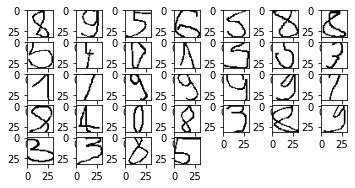

In [89]:
i = 0
for index, row in wrongs.iterrows():
    im = Image.open(row['path'])
    plt.subplot(7,7,i+1)
    plt.imshow(im)
    i+=1

The numbers that weren't classified correctly are distorted, don't fit in the image properly, and are unclear in other ways also. A human could easily distinguish the numbers however.